In [1]:
import numpy as np
from astrotools import reader
from astrotools import interpolate

In [2]:
data = reader.read_slap('/Users/szymon/Dropbox/Projects/PublishedSLSNe/Flux/07D2bv.dat')
data = reader.normalize_lc(data)
data = list(reader.slice_band_generator(data))
data = data[0]  # Use only one band of the data

In [3]:
gp = interpolate.GP()
gp.fit_reduce(data, init_kernel_size=1000)

In [4]:
x = np.linspace(data['mjd'].min(), data['mjd'].max(), 500)
mu, std = gp.predict(x)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

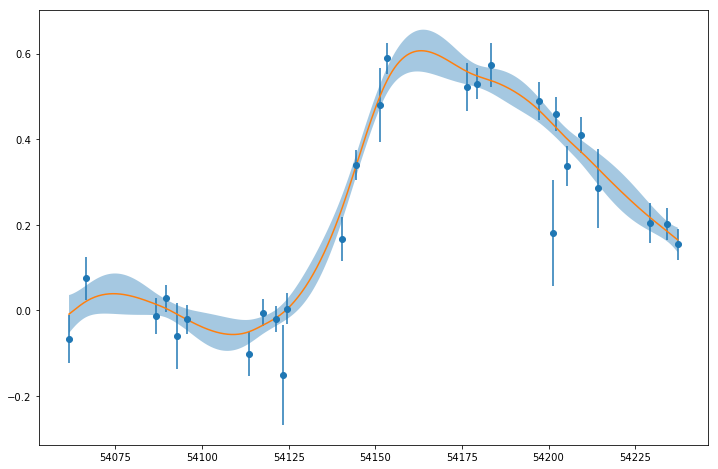

In [6]:
plt.errorbar(data['mjd'], data['flux'], yerr=data['flux_err'], fmt='o')
plt.fill_between(x, mu + std, mu - std, alpha=0.4)
plt.plot(x, mu)